In [1]:
import torch
import torchvision

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(download=True, root='./data', train=True, transform=transform)
testset  = torchvision.datasets.MNIST(download=True, root='./data', train=False, transform=transform)

In [3]:
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=4, num_workers=2)

In [5]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(784, 32)
            , torch.nn.ReLU()
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(32, 784)
            , torch.nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

autoencoder = Autoencoder()


In [35]:
#criterion = torch.nn.functional.binary_cross_entropy()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adadelta(autoencoder.parameters())
#autoencoder.load_state_dict(torch.load('./tmp/MNIST_autoencoder_state2'))
w1 = torch.load('./tmp/MNIST_autoencoder_state')
w2 = torch.load('./tmp/MNIST_autoencoder_state2')
k1 = set(w1.keys())
k2 = set(w2.keys())

print(w1.keys())
w1['decoder.0.weight']=w1['decoder.2.weight']
w1['decoder.0.bias']=w1['decoder.2.bias']
del w1['decoder.2.weight']
del w1['decoder.2.bias']
autoencoder.load_state_dict(w1)

odict_keys(['encoder.0.weight', 'encoder.0.bias', 'decoder.0.weight', 'decoder.0.bias', 'decoder.2.weight', 'decoder.2.bias'])
While copying the parameter named decoder.0.weight, whose dimensions in the model are torch.Size([784, 32]) and whose dimensions in the checkpoint are torch.Size([784, 784]), ...


RuntimeError: inconsistent tensor size, expected tensor [784 x 32] and src [784 x 784] to have the same number of elements, but got 25088 and 614656 elements respectively at /opt/conda/conda-bld/pytorch_1503965122592/work/torch/lib/TH/generic/THTensorCopy.c:86

In [45]:
###
import timeit
start_time = timeit.default_timer()
###
for epoch in range(10):
    for batch_number, data in enumerate(trainset):
        optimizer.zero_grad()
        x, _ = data
        x = x.view(1, 784)
        x = torch.autograd.Variable(x)
        output = autoencoder(x)
        #output = output.view(1, 784)
        loss = criterion(output, x)
        #loss = torch.nn.functional.binary_cross_entropy(output, x)
        loss.backward()
        optimizer.step()
        if batch_number % 2000 == 1999:
            print('epoch: ', epoch, 'loss: ', loss.data[0])
###
elapsed = timeit.default_timer() - start_time
print("time: ", elapsed)
###

epoch:  0 loss:  0.021925784647464752
epoch:  0 loss:  0.023387959226965904
epoch:  0 loss:  0.012173493392765522
epoch:  0 loss:  0.018199259415268898
epoch:  0 loss:  0.008230987004935741
epoch:  0 loss:  0.02204929292201996
epoch:  0 loss:  0.020304279401898384
epoch:  0 loss:  0.00691981241106987
epoch:  0 loss:  0.016802245751023293
epoch:  0 loss:  0.028538713231682777
epoch:  0 loss:  0.010397843085229397
epoch:  0 loss:  0.0152888847514987
epoch:  0 loss:  0.010945264250040054
epoch:  0 loss:  0.010427983477711678
epoch:  0 loss:  0.011847763322293758
epoch:  0 loss:  0.016551611945033073
epoch:  0 loss:  0.015821581706404686
epoch:  0 loss:  0.015576924197375774
epoch:  0 loss:  0.015738926827907562
epoch:  0 loss:  0.027991551905870438
epoch:  0 loss:  0.017992256209254265
epoch:  0 loss:  0.01242416724562645
epoch:  0 loss:  0.007856734097003937
epoch:  0 loss:  0.02039070427417755
epoch:  0 loss:  0.02403527870774269
epoch:  0 loss:  0.018508074805140495
epoch:  0 loss:  0.

epoch:  7 loss:  0.004495915025472641
epoch:  7 loss:  0.007123460527509451
epoch:  7 loss:  0.01186881959438324
epoch:  7 loss:  0.006320393178611994
epoch:  7 loss:  0.009035009890794754
epoch:  7 loss:  0.007440485060214996
epoch:  7 loss:  0.008620171807706356
epoch:  7 loss:  0.004146430175751448
epoch:  7 loss:  0.006392606068402529
epoch:  7 loss:  0.008653935976326466
epoch:  7 loss:  0.008559360168874264
epoch:  7 loss:  0.006474032066762447
epoch:  7 loss:  0.024622151628136635
epoch:  7 loss:  0.013159086927771568
epoch:  7 loss:  0.006450126878917217
epoch:  7 loss:  0.004516532178968191
epoch:  7 loss:  0.014520350843667984
epoch:  7 loss:  0.014991057105362415
epoch:  7 loss:  0.010720411315560341
epoch:  7 loss:  0.013679361902177334
epoch:  7 loss:  0.0074517265893518925
epoch:  7 loss:  0.011426507495343685
epoch:  7 loss:  0.013549253344535828
epoch:  8 loss:  0.014556176029145718
epoch:  8 loss:  0.009788768365979195
epoch:  8 loss:  0.007114415057003498
epoch:  8 lo

In [9]:
torch.save(autoencoder.state_dict(), './tmp/MNIST_autoencoder_state2')

In [32]:
testloader = torch.utils.data.DataLoader(testset, batch_size=10, num_workers=2)
n=0
for num_batch, data in enumerate(testloader):
    myInput, _ = data
    myInput = myInput.view(10, 1, 784)
    myInput = torch.autograd.Variable(myInput)
    myOutput = autoencoder(myInput)
    break
    
myInput = myInput.data.numpy()
myOutput = myOutput.data.numpy()

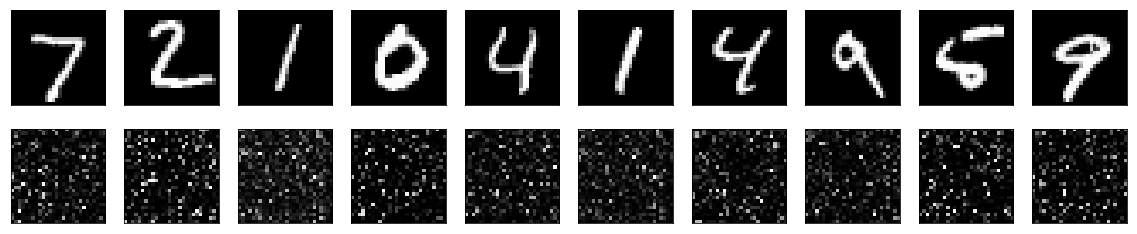

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(myInput[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(myOutput[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()